In [81]:
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from IPython.display import display

In [82]:
plt.style.use('ggplot')

# 11-summary

## Przygotwanie danych

### Surowe dane

* Dane pochodzą ze strony [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) i zawierają prawie 430k wierszy.
* Każdy wiersz reprezentuje pojedyńczą ofertę sprzedaży na portalu [Craig's List](https://www.craigslist.org/).
* Dane zawierają typowe informacje jakich można się spodziewać czyli marka, model, kolor, przebieg, rok produkcji itd.
* Jak można zauważyć, w notatniku `0-initial-research` dane są w opłakanym stanie.
* Główne zarzuty pod adresem jakości danych to wartości odstające, brakujące wartości i duża ilość zmiennych jakościowych.
* Ponadto znajdziemy również kolumny które z punktu widzenia są nieistotne przykładowo numer VIN pojazdu.

### Czyszczenie danych

* Po przeglądnięciu w `1-data-cleaning` zmiennych podjąłem decyzje o wykonaniu następujących kroków:
* Usunięciu zduplikowanych wierszy
* Z danych zostali usunięci "rzadcy producenci" na przykład Porsche.
* Pozbycie się kolumn z nieznaną datą dodania
* Ograniczenie ofert do ostatnich dwudziestu lat
* Usunięciu samochodów które nie nadają się do jazdy (tzw. samochodów na części)
* Dla bezpieczeństwa odfiltrowuje wiersze z ujemną ceną i ujemnym przebiegiem.
* Usuwamy również kolumny które nic nie wnoszą przykładowo VIN, adress URL, ID oferty itd.
* W przypadku zmiennych objaśniających ciągłych usunięte zostały wartości odstające korzystając z rozstępu ćwiartkowego.
* Brakujące wartości w kolumnach której ich odsetek wynosił mniej niż 40% dane zostały wypełnione modą/medianą.
* Jak można zauważyć na ilustracjach w `1-data-cleaning`, zbiór prezentuje się dużo lepiej po tych zabiegach.

### Inżyniera zmiennych objaśnających

* W notatniku `2-feature-engineering` tworzymy zmienne objaśniające które mają ułatwić modelom naukę.
* Zastosowane zostały `dummy variables` które dla każdej kategorycznej kolumny o $n$ wartościach generują $n-1$ kolumn binarnych.
* Rok został zamieniony na wiek.
* Po takim zabiegu mam prawie 170k wierszy i 74 kolumny.

### Podział na zbiór uczący i testowy

* W notatniku `3-data-splitting` dokonujemy podziału zgodnie z przyjętymi praktykami.
* Dane zostały podzielone stosując typowe wartości.
* $66\%$ wierszy stanowić będzie zbiór treningowy
* $33\%$ wierszy stanowić będzie zbiór testowy

## Sposób uczenia i walidacji

* Modele będą (w miarę możliwości) testowane w podobny sposób.
* W szczególności, dla uzyskanie powtarzalnych wyników będziemy ustawiać `random_seed = 4`.
* Dane będą standaryzowane.
* Zastosowana zostanie walidacja krzyżowa z przetasowaniem.
* Hiperparametry będą optymalizowane.
* Dla uniknięcia przeuczenia, siatki hiperparametrów będą ustalone w sposób dość konserwatywny.
* Miarą którą będziemy się posługiwać to błąd średniokwadratowy (`RMSE`).

## Modele z `scikit-learn`.

### 1. Model bazowy

* W notatniku `4-baseline-model` stworzony został naiwny model bazowy.
* Jako model bazowy wykorzystamy model który zawsze prognozuje $\bar{y}$.

### 2. Modele liniowe

* Notatnik `5-linear-models` dotyczy modeli liniowych.
* Nauczone zostały modele klasycznej regresji oraz modele z regularyzacją.
* Modele z regularyzacją pozwalają w naturalny sposób wybrać istotne zmienne (pod warunkiem że dane są zestandaryzowane).
* Poniżej widizmy zmienne które zostały uznane za ważne przez model `Lasso`.
* Wyniki pozostają w zgodzie z oczekiwaniami, przykładowo rok ma dość negatywny wpływ na cenę samochodu, jak również przebieg.
* Ogólnie rzecz ujmując, modele liniowe osiągneły zbliżone do siebie RMSE na poziomie około $6155$USD

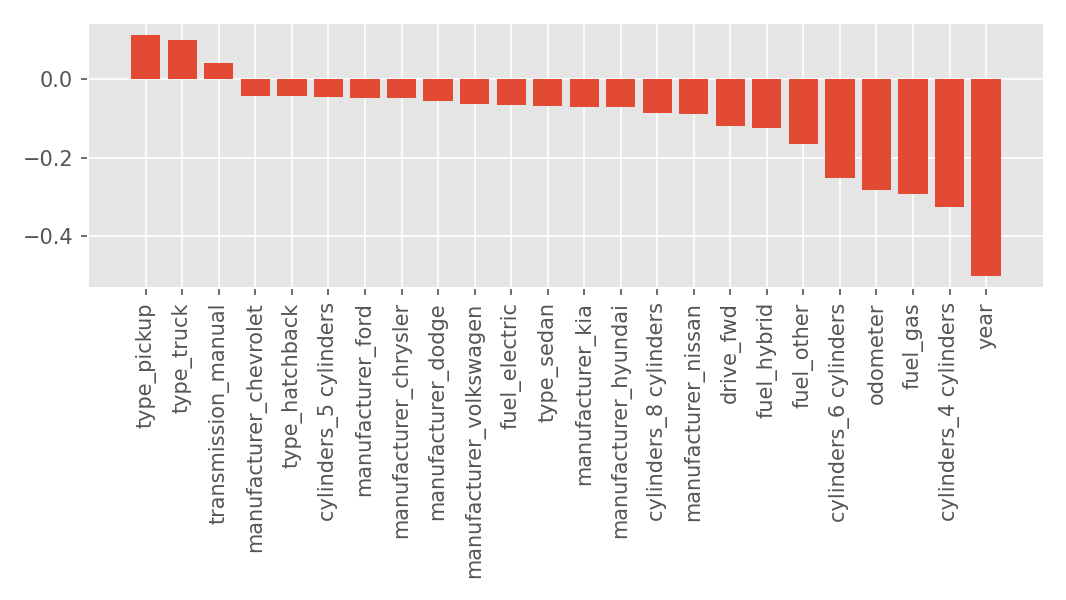

In [83]:
display(Image.open('../reports/figures/lasso_coeffs.png'))

### 3. Drzewa decyzyjne i lasy losowe

* Notatnik `6-tree-models` ucze modele bazujące na drzewach decyzyjnych.
* Lasy i drzewa dają się interpretować na dwa sposoby.
* Pierwszy sposób to ważność (ang. importance).
* Drugi sposób to ilustracja drzewa.
* Na poniżej ilustracji widzimy zmienne które algorytm lasów losowych uznał za istotne.

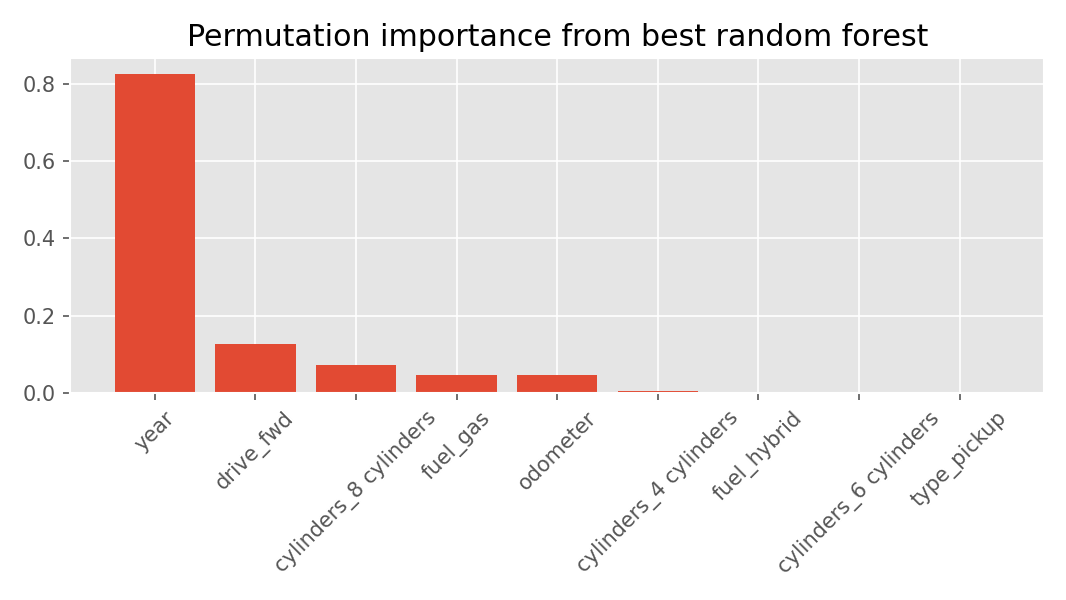

In [84]:
display(Image.open('../reports/figures/forest_permutation_importances.png'))

### 4. Sieć neuronowa

* Notatnik `7-neural-networks` jest na temat sieci neuronowych.
* Uczenie sieci sprowadza się tak na prawdę do powolnego poprawiania współczynników w tych macierzach aż osiągnie się zadawalające wyniki lub kryterium stop.
* Na ilustracji widzimy ile kroków potrzebuje sieć, żeby osiągnąć zbieżność (ang. convergence).
* W tym przypadku najlepszą siecią okazała się sieć która ma warstwy (100, 100). Osiągnęła `RMSE` na poziome $4880$USD.
* Interpretacja sieci neuronowych istotnie wykracza poza tematykę tego projektu.

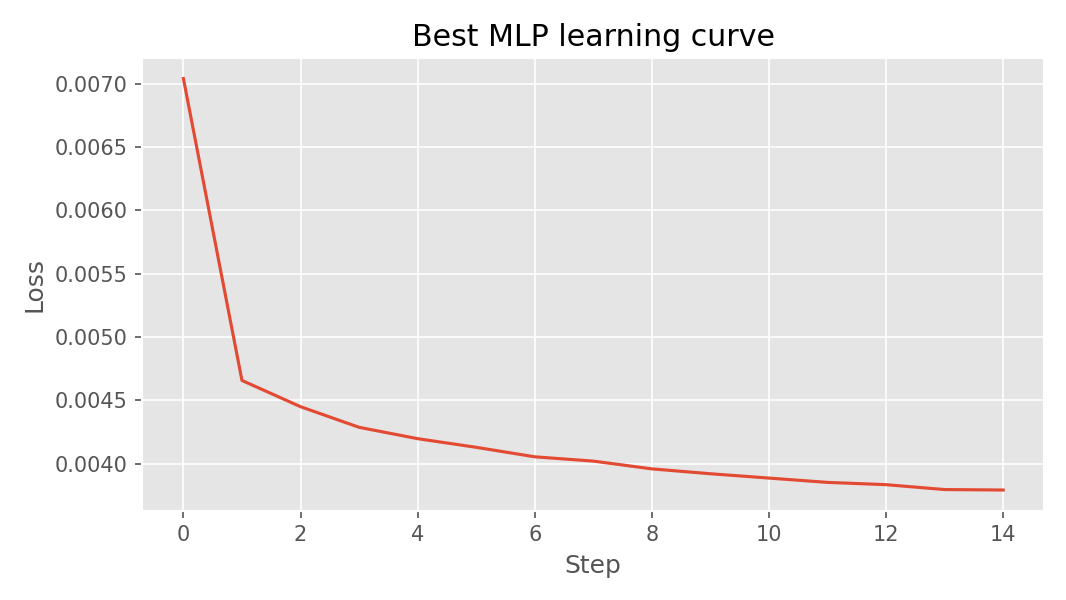

In [85]:
display(Image.open('../reports/figures/mlp_learning_curve.png'))

### 5. Boosting

* Notatnik `8-ensemble-models` jest między innymi od Ada Boost.
* Innym ciekawym modelem jest model Ada Boost.
* Intuicja tutaj jest taka aby wziąc parę "słabych modeli" i skonstruować model lepszy.
* Model osiągnął niezadawalące RMSE na poziomie $7763$USD.

## Modele z innych paczek

### 6. Model `LightGBM`

* Notatnik `9-light-gbm` dotyczy `LightGBM`.
* Obiekty z biblioteki współpracują z narzędziami dostępnymi w `scikit-learn`.
* Model/Biblioteka została napisana przez specjalistów z `Microsoft`.
* Jest to wariacja na temat drzewa decyzyjnego.
* W odróżnieniu od klasycznych drzew decyzyjnych, które co do zasady rosną poziomami, drzewo w `LightGBM` rośnie po przez dodawanie liści.
* Model korzysta też z paru innowacji.
* Taką innowacją jest Gradient Bases One-Side Sampling, czyli odrzucanie obserwacji w których funkcja celu ma mały gradient. To generalnie ma sens bo mały gradient implikuje to, że tej obserwacji model się "nauczył".
* Korzysta też z Exclusive Feature Bundling które służy do redukcji wymiaru danych co w konsekwencji pozwala istotnie na szybsze uczenie.
* Grupowanie zmiennych objaśniających odbywa się poprzez konstrukcję grafu ważonego miarą konfliktów między zmiennymi. Konflikt między zmiennymi jest zdefiniowany jako odsetek obserwacji mających jednocześnie niezerowe wartośc. Zmienne się następnie sortuje (według stopnia wierzchołka) i grupuje.
* Model osiągnął najlepsze wyniki w dość szybkim czasie.

### 7. Model `XGBoost`

* Notatnik `10-xg-boost` dotyczy modelu `XGBoost`.
* Obiekty z biblioteki współpracują z narzędziami dostępnymi w `scikit-learn`.
* Model/Biblioteka znany jest z tego, że wygrywał konkursy na platformie Kaggle. Przez wielu jest traktowany jako domyślny algorytm dla ustrukturyzowanych danych.
* Jest to wariacja na temat drzewa decyzyjnego.
* Automatycznie obsługuje brakujące wartości.
* Wspiera walidację krzyżową w trakcie uczenia.
* Wspiera przerywanie procesu uczenia.
* Jak nazwa wskazuje jest to przykład "boostingu" czyli korzystania z słabych modeli do stworzenia dobrego modelu.
* Kolejne drzewa uczone są na podstawie reszt sumy poprzednich drzew.
* Na poniższej ilustracji widzimy strukturę drzewa.

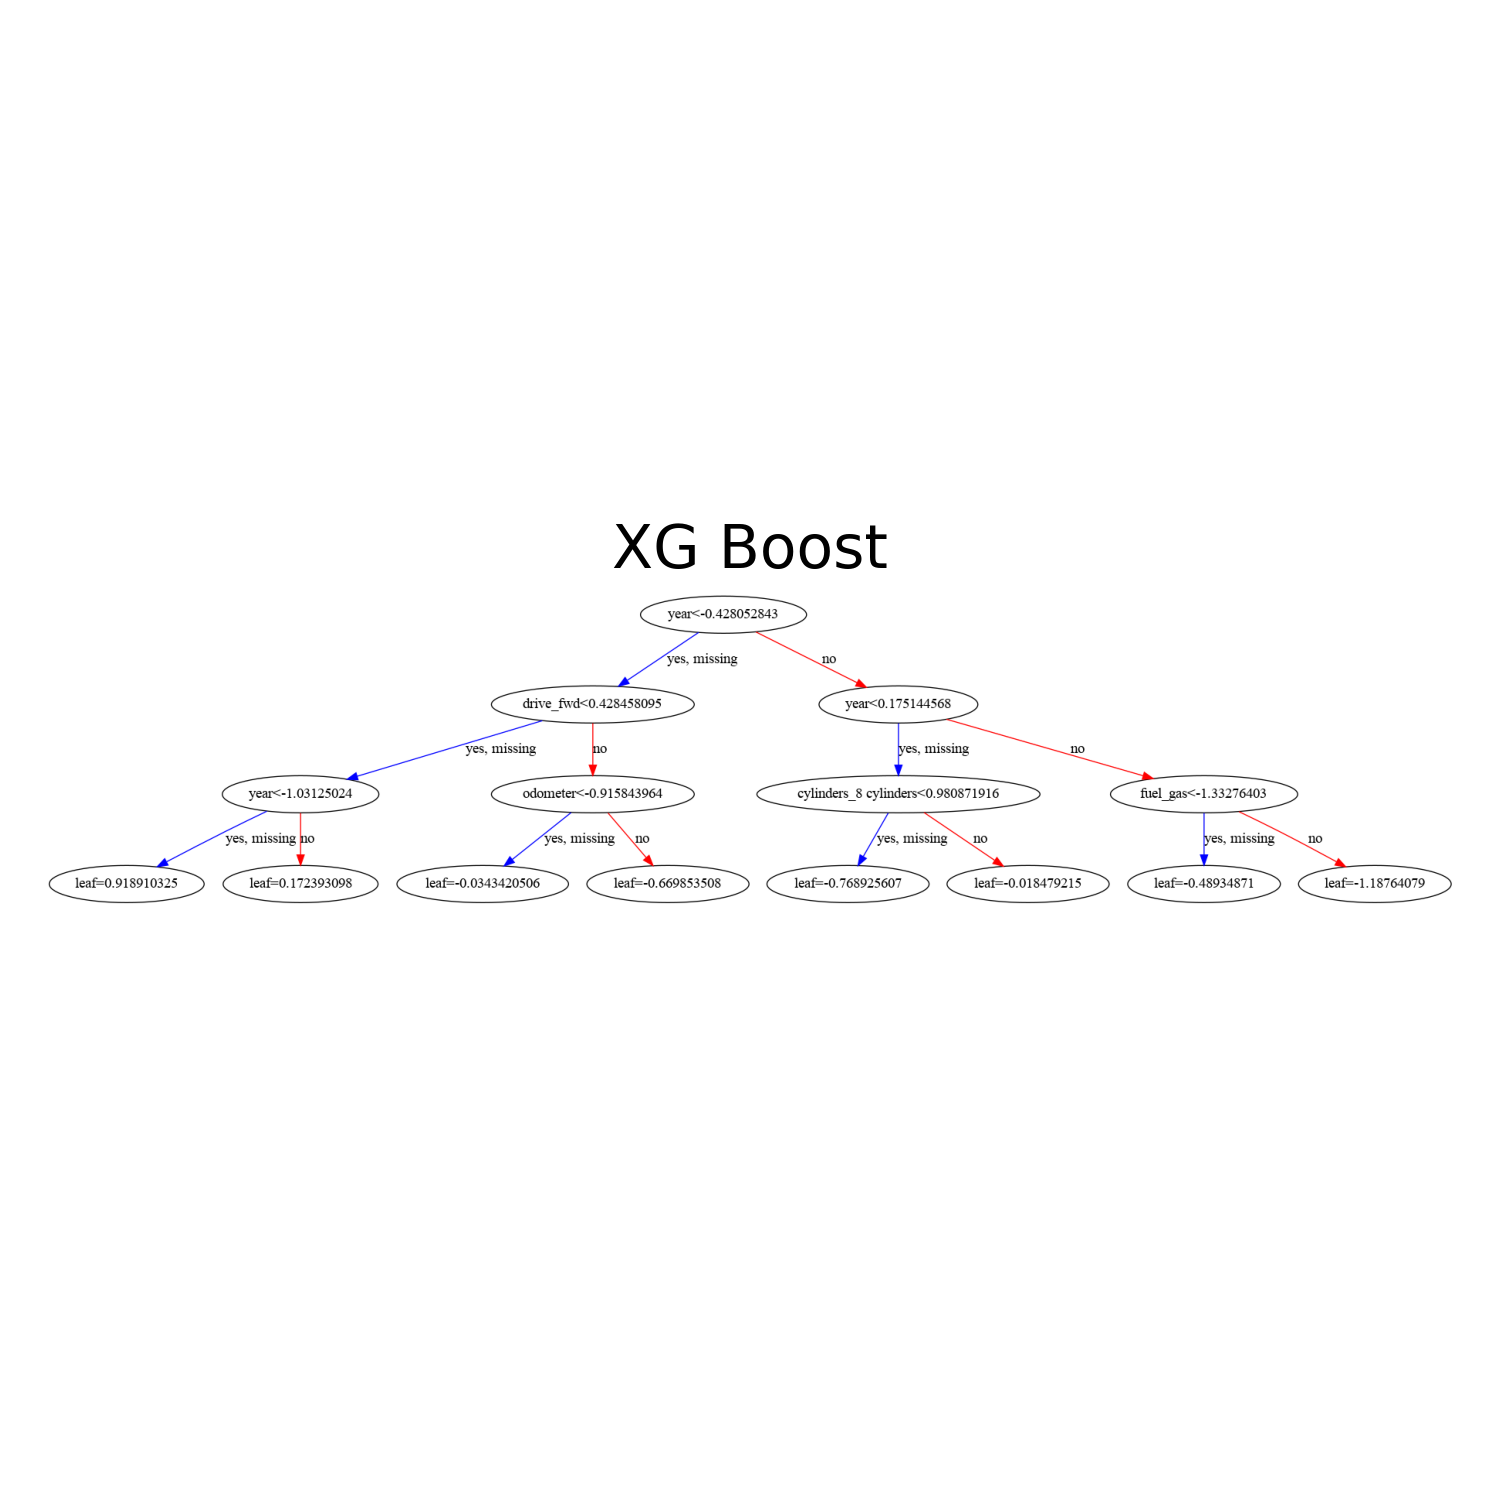

In [92]:
display(Image.open('../reports/figures/xgb_tree.png'))

## Wyniki

In [87]:
models = [
    'Base model',
    'Linear Models',
    'Decision tree',
    'Multi layer perceptron',
    'Ada Boost',
    'Light GBM',
    'XGBoost',
]

In [88]:
scores = [
    10932,
    6155,
    7138,
    4880,
    7763,
    4849,
    5042,
]

In [89]:
df = pd.DataFrame(zip(models, scores), columns=['Model', 'Root Mean Square Error'])
df.sort_values('Root Mean Square Error', inplace=True)
df

,Model,Root Mean Square Error
5,Light GBM,4849
3,Multi layer perceptron,4880
6,XGBoost,5042
1,Linear Models,6155
2,Decision tree,7138
4,Ada Boost,7763
0,Base model,10932


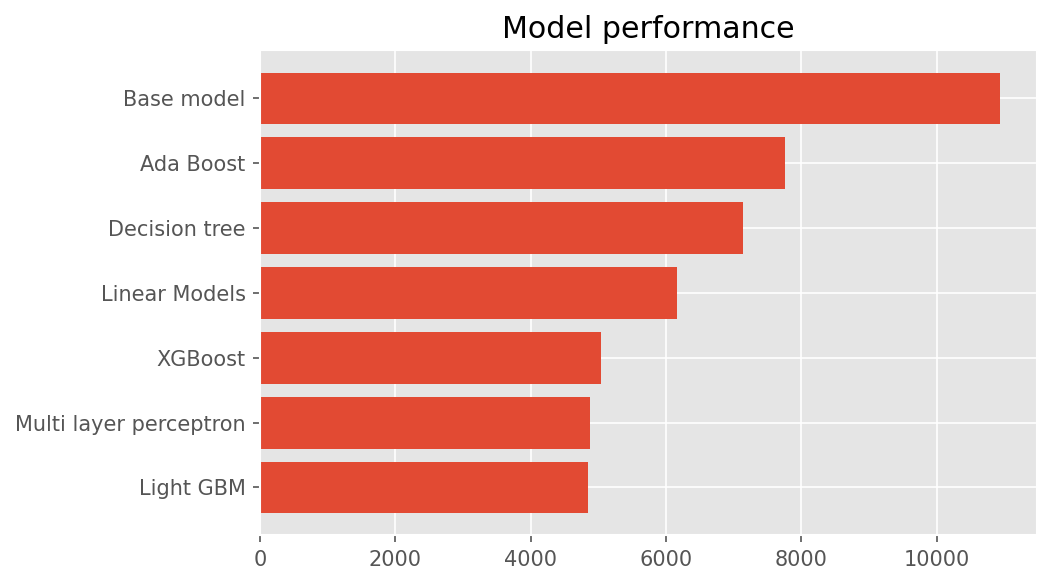

In [95]:
plt.figure(figsize=(4 * (16/9),4), dpi=150)
plt.barh(df['Model'], df['Root Mean Square Error'])
plt.title('Model performance')
plt.tight_layout()

* Jak widać na powyższej ilustracji `LightGBM` osiągnał namniejsze `RMSE`.
* Jest to `RMSE` o ponad połowę lepsze niż model naiwny.

# Uwagi końcowe

## Rzeczy które można było zrobić lepiej

* Jasnym jest, że lepsze przygotowanie danych pewnie przełożyłoby się na lepsze wyniki. Po wyczyszczeniu danych mniej niż połowa wiersze została użyta do nauki i testowania (430k vs 170k).
* Wypełnienie brakujących danych modą/medianą jest odważnym posunięciem. Być może zastosowanie algorytmu kNN do wypełnienia danych dałoby lepsze wyniki.
* Być może uwzględnienie położenia samochodu (stanu) dało by lepsze wyniki.
* Być może po uważnej inwestygacji reszt modeli dało by się zauważyć dodatkowe grupy samochodów dla których modele mają słabe wyniki.